<a href="https://colab.research.google.com/github/beamscource/colab_notebooks/blob/main/dl_frameworks_intros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow/Keras (Google)


Tensorflow (TF) is a Python library which allows to perform *auto-differentiation* on graphs (neural networks) which is required to implement backpropagation.

One of the central concepts of a TF model is a *graph* (a syntax tree) which describes all computations that are possible within a model. So, we could say that the **nodes of a graph contain mathematical operations** (e.g., matrix multiplications, application of activation functions etc).

All computations have to be executed within the context of a *session* which provides the corresponding methods to do this. The session object is, for instance, responsible to place different computations on the CPU or GPU. 

Apart from computations, a graph also defines *tensors* - 'containers' for the numerical data passed through the graph. We can say that **tensors constitute graph's edges**.

**Each session has a construction and an execution phase.** During the construction phase, a graph is assembled that has nodes (operations) and edges (tensors). During the execution phase, operations (linear/non-liner transformations, differentiation) are performed on the graph. The TF library has a default graph to which operation constructors add specific nodes.

For instance, to perform matrix multiplication, **you need first to create variables** for both matrices, placeholders, **and constant values**. Then you need to **create a session object and initialize variables**. Finally, **you feed your data to placeholders so as to invoke any action.** To actually evaluate the nodes, you must run the computational graph within the session.

**The value of a variable is valid only within a secific session.** If you try to query the value afterward in a second session, TF will raise an error because the variable is not initialized there. **To run any operation, you need to create a session for that graph.** The session will also allocate memory to store the current value of the variable.

For TF's history see https://blog.tensorflow.org/2020/09/brief-history-of-tensorflow-extended-tfx.html

In [ ]:
import tensorflow as tf

# create a session
sess = tf.compat.v1.Session() # for TF 2
#sess = tf.Session() # for TF 1

myGraph = tf.Graph() # define a graph

with myGraph.as_default():
  # define a variable and initialize it within the graph
  variable = tf.Variable(30, name='navin')
  initialize = tf.compat.v1.global_variables_initializer() # for TF 2
  #initialize = tf.global_variables_initializer() # for TF 1

# with the seession run the graph a evaluate the variable
with tf.compat.v1.Session(graph=myGraph) as sess:
  sess.run(initialize)
  print(sess.run(variable))

30


As you can see, this doesn't feel Pythonic in any way and makes debugging of network models difficult. Therefore, TFv2 introduced the *eager execution mode* which allows to inspect all variables and to change graph nodes during run-time without the need to execute a session.

In [ ]:
# use this code to convert a TF1 script into TF2 script
tf_upgrade_v2 --infile in.py --outfile out.py

# or update TF1 script with following two lines
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#see for more migration details https://www.tensorflow.org/guide/migrate/tf1_vs_tf2

For more TF tutorials see https://www.tensorflow.org/hub/tutorials

**tf.keras**

TF offers various tools for production deployment and maintenance,
debugging and visualization, and running models on embedded devices and
browsers. As a high-level API, TF uses Keras. Although Keras used to be a stand-alone Python library, now it's icluded as part of TF and is commonly called tf.keras. In the technology industry, Keras is used by Google, Netflix, Uber, and NVIDIA.

In the tf.keras library, layers are connected to one another like pieces of
Lego, resulting in a model that is clean and easy to understand. Model training
is straightforward, requiring only data, a number of epochs of training, and
metrics to monitor.

Typical models can be built in just a few lines of code using the *Sequential model API*. However, Keras can also build more advanced and complex models using its *functional API* and *Model* and *Layer* classes for dynamic graphs, which can be customized.

On hardware, Keras runs on a CPU, GPU, and Google's TPU.

All examples can be found at https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras

Official Keras guide can be found at https://keras.io

In [ ]:
# migrating from stand-alone library
# from keras... import ...
# from tensorflow.keras... import ...

Keras..

- is slower than pure TF code
- however, much simpler to implement
- more difficult to debug, but since the models are simple, there is less probability that it's neccessary

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

# check whether tf.keras is installed
print(tf.keras.backend.epsilon())

Version:  2.8.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE
1e-07


**Multi-layer perceptrons (MLP)**

In [ ]:
# required for model visualization
!pip install pydot

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 256)               200960    
                                                                 
 activation_19 (Activation)  (None, 256)               0         
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 activation_20 (Activation)  (None, 256)               0         
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 10)               

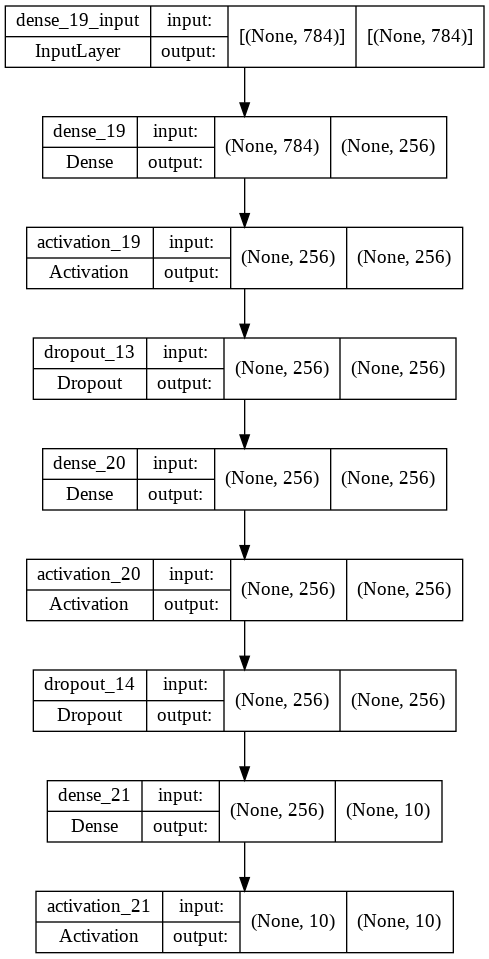

In [ ]:
'''
A MLP network for MNIST digits classification
98.3% test accuracy in 20epochs
https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

import numpy as np
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation, Dropout
#from tensorflow.keras.utils import to_categorical, plot_model
#from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels (training classes)
num_labels = len(np.unique(y_train))

# convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# define input size by looking at image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize training and test data
# x_train and x_test are reshaped to [60,000, 28 * 28]
# and [10,000, 28 * 28], respectively
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255 # normalization to 0 to 1 range
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# DEFINE A MODEL 
# define network and hyperparameters
batch_size = 128
hidden_units = 256 # number of "neurons"
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential() # use sequential API

# add to the model dense and dropout layers
# use ReLU activation functions
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout)) # uses 45% dropout value
model.add(Dense(hidden_units)) # you don't have to formulate the input size for hidden layers
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels)) # output layer has same dimension as the number of classes
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()

# plot model graph
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
# COMPILE THE MODEL

# define loss function for one-hot vector
# define the adam optimizer
# track accuracy as good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
#model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# you can also have a validation step after each epoch
# in that case you need a three-way data split: train/vel/test
# model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_data=(x_val, y_val))
# OR split up your training data into a validation portition during training
model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

# evaluate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=1) # try to set to 1
print("\nTest accuracy on the test set is: %.1f%%" % (100.0 * acc))

Epoch 1/20
375/375 [==============================] - 4s 9ms/step - loss: 0.2240 - accuracy: 0.9505 - val_loss: 0.1574 - val_accuracy: 0.9666
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 0.1760 - accuracy: 0.9578 - val_loss: 0.1506 - val_accuracy: 0.9678
Epoch 3/20
375/375 [==============================] - 4s 10ms/step - loss: 0.1601 - accuracy: 0.9597 - val_loss: 0.1520 - val_accuracy: 0.9662
Epoch 4/20
375/375 [==============================] - 4s 9ms/step - loss: 0.1531 - accuracy: 0.9606 - val_loss: 0.1413 - val_accuracy: 0.9692
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.1471 - accuracy: 0.9624 - val_loss: 0.1421 - val_accuracy: 0.9691
Epoch 6/20
375/375 [==============================] - 4s 10ms/step - loss: 0.1374 - accuracy: 0.9652 - val_loss: 0.1403 - val_accuracy: 0.9691
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.1307 - accuracy: 0.9654 - val_loss: 0.1371 - val_accuracy: 0.9701
Epoc

**Convolutional neural network (CNN)**

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

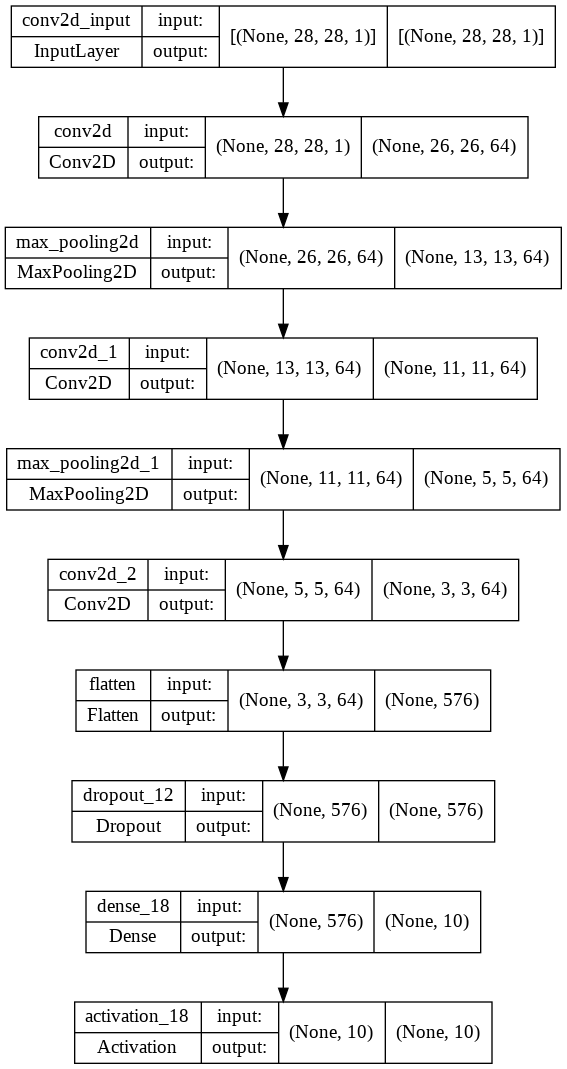

In [ ]:
''' CNN MNIST digits classification
3-layer CNN for MNIST digits classification 
First 2 layers - Conv2D-ReLU-MaxPool
3rd layer - Conv2D-ReLU-Dropout
4th layer - Dense(10)
Output Activation - softmax
Optimizer - Adam
99.4% test accuracy in 10epochs
https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [ ]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
469/469 [==============================] - 81s 171ms/step - loss: 0.2625 - accuracy: 0.9215
Epoch 2/10
469/469 [==============================] - 84s 178ms/step - loss: 0.0665 - accuracy: 0.9794
Epoch 3/10
469/469 [==============================] - 81s 172ms/step - loss: 0.0484 - accuracy: 0.9848
Epoch 4/10
469/469 [==============================] - 81s 173ms/step - loss: 0.0373 - accuracy: 0.9879
Epoch 5/10
469/469 [==============================] - 81s 173ms/step - loss: 0.0308 - accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 81s 172ms/step - loss: 0.0269 - accuracy: 0.9920
Epoch 7/10
469/469 [==============================] - 80s 171ms/step - loss: 0.0238 - accuracy: 0.9926
Epoch 8/10
469/469 [==============================] - 81s 172ms/step - loss: 0.0212 - accuracy: 0.9929
Epoch 9/10
469/469 [==============================] - 80s 171ms/step - loss: 0.0187 - accuracy: 0.9940
Epoch 10/10
469/469 [==============================] - 80s 171ms/step - l

**Recurrent neural networks**

In [ ]:
'''
RNN for MNIST digits classification
98.3% test accuracy in 20epochs
https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [ ]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

For more examples see https://keras.io/examples/

**Model's hyperparameters**

In [ ]:
# defining learning rate by creating an optimizer object
# hard coded learning rate
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

# with learning rate decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=lr_schedule,
              metrics=['accuracy'])

# for more see https://keras.io/api/optimizers/

# L1/L2 regularization can be applied to singular layers
from tensorflow.keras.regularizers import l2, activity_l2

# kernel regularization
model.add(Dense(hidden_units, kernel_regularizer=l2(0.001), input_dim=input_size))

# weights regularization + activity regularization
model.add(Dense(64, input_dim=64, W_regularizer=l2(0.01),
activity_regularizer=activity_l2(0.01)))



**Keras Tuner**

Allows you to quickly find best hyperparameters for a model. For more see https://keras.io/keras_tuner/

In [ ]:
!pip install keras-tuner --upgrade

import keras_tuner as kt

# define a function taking a hyper parameter
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

# initialize a tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5) # number of models to try

# train with a tuner to find best performining model
tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
best_model = tuner.get_best_models()[0]

**Sequential vs Functional API**

Functional API acts as an alternative method for building networks in tf.keras and enables us to build more complex networks that cannot be accomplished by the Sequential API.

In the Sequential API a layer is stacked on top of another layer. Generally, the model will be accessed through its input and output layers. There is no simple mechanism if we find ourselves wanting to add an auxiliary input at the middle of the network, or even to extract an auxiliary output before the last layer. In addition, it's also difficult to share layers between the two models.

It possible to define residual connections with non-sequential flows, and shared and reusable layers. Each layer is callable (with a tensor in input), and each layer returns a tensor as an output.

After building a model with Functional API, the training and
evaluation are performed by the same functions used in models built with Sequential API.

In [ ]:
# rewriting the CNN model in Functional API

''' Using Functional API to build CNN
~99.3% test accuracy
'''

import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# from sparse label to categorical
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# reshape and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
filters = 64
dropout = 0.3

# use functional API to build cnn layers

# first, we define layers
# note that we can access the output tensor of each layer y
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
# image to vector before connecting to dense layer
y = Flatten()(y)
# dropout regularization
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)

# network model in text
model.summary()

In [ ]:
# nothing changes for training and evaluation
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the model with input images and labels
model.fit(x_train,
          y_train,
          validation_data=(x_test, y_test),
          epochs=20,
          batch_size=batch_size)

# model accuracy on test dataset
_, acc = model.evaluate(x_test,
                       y_test,
                       batch_size=batch_size,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

The Sequential API is designed for building 1-input and 1-output models only. With Functional API, however, we can build advanced models with multiple inputs.


**Model subclassing**

Model subclassing offers the highest flexibility and it is generally used when
you need to define your own layer. In order to create a custom layer, we can subclass tf.keras.layers.Layer and implement the following methods:

• __init__: Optionally used to define all the sublayers to be used by this layer. This is the constructor where you can declare your model.

• build: Used to create the weights of the layer. You can add weights with
add_weight().

• call: Used to define the forward pass. This is where your layer is called and
chained in functional style.

• Optionally, a layer can be serialized by using get_config() and deserialized
using from_config().

In [ ]:
class MyLayer(layers.Layer):
  def __init__(self, output_dim, **kwargs):
    self.output_dim = output_dim
    super(MyLayer, self).__init__(**kwargs)
  def build(self, input_shape):
    # Create a trainable weight variable for this layer.
    self.kernel = self.add_weight(name='kernel',
                              shape=(input_shape[1], self.output_dim),
                              initializer='uniform',
                              trainable=True)
  def call(self, inputs):
    # Do the multiplication and return
    return tf.matmul(inputs, self.kernel)

# use customized layer in a model
model = tf.keras.Sequential([
    MyLayer(20),
    layers.Activation('softmax')])

**Custom training**

TF is an auto-differentiation library. However, there are ways to adapt the optimization process (gradient descent). There are multiple ways of computing gradients.

1. tf.GradientTape()
2. tf.gradient_function()
3. tf.value_and_gradients_function()
4. tf.implicit_gradients()

In [ ]:
@tf.function
def train_step(inputs, labels):
  with tf.GradientTape() as tape:
    predictions = model(inputs, training=True)
    regularization_loss = // TBD according to the problem
    pred_loss = // TBD according to the problem
    total_loss = pred_loss + regularization_loss
    
  gradients = tape.gradient(total_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

for epoch in range(NUM_EPOCHS):
  for inputs, labels in train_data:
    train_step(inputs, labels)
  print("Finished epoch", epoch)

**Distributed training**

One very useful addition to TensorFlow 2.x is the possibility to train models using distributed GPUs, multiple machines, and TPUs in a very simple way with very few additional lines of code. *tf.distribute.Strategy* is the TensorFlow API used in this case and it supports both *tf.keras* and *tf.estimator* APIs and eager execution. You can switch between GPUs, TPUs, and multiple machines by just changing the strategy instance.


In [ ]:
# this is the distribution strategy to use multiple GPUs
distribution = tf.distribute.MirroredStrategy()

# this piece of code is distributed to multiple GPUs
with distribution.scope():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(N_FEATURES,)))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  optimizer = tf.keras.optimizers.SGD(0.2)
  model.compile(loss='binary_crossentropy', optimizer=optimizer)

Optimize/train the model in the usual way. For more strategies see https://www.tensorflow.org/api_docs/python/tf/distribute/Strategy

**Callbacks (model checkpoints, Tensorboard)**

Callbacks are objects passed to a model to extend or modify behaviors during
training.

• tf.keras.callbacks.ModelCheckpoint: This feature is used to save
checkpoints of your model at regular intervals and recover in case of
problems.

• tf.keras.callbacks.LearningRateScheduler: This feature is used
to dynamically change the learning rate during optimization.

• tf.keras.callbacks.EarlyStopping: This feature is used to interrupt
training when validation performance has stopped improving after a while.

• tf.keras.callbacks.TensorBoard: This feature is used to monitor the
model's behavior using TensorBoard.

In [ ]:
# integrating Tensorboard logs into training
callbacks = [
  # Write TensorBoard logs to './logs' directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

# for more settings see https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

model.fit(data, labels, batch_size=256, epochs=100,
          callbacks=callbacks,
          validation_data=(val_data, val_labels))

**Saving model and model parameters**

After training a model, it can be useful to save the weights in a persistent way.

In [ ]:
# Save weights to a Tensorflow Checkpoint file
model.save_weights('./weights/my_model')

# Save weights to a HDF5 file
model.save_weights('my_model.h5', save_format='h5')

# Restore the model's state
model.load_weights(file_path)

# save the model as a JSON object
json_string = model.to_json() # save
model = tf.keras.models.model_from_json(json_string) # restore

# save the model as a YAML object
yaml_string = model.to_yaml() # save
model = tf.keras.models.model_from_yaml(yaml_string) # restore

# save model together with weights and optimization parameters
model.save('my_model.h5') # save
model = tf.keras.models.load_model('my_model.h5') #restore


**TF datasets**

In [ ]:
import tensorflow_datasets as tfds

# See all registered datasets
builders = tfds.list_builders()
print(builders)

# Load a given dataset by name, along with the DatasetInfo metadata
data, info = tfds.load("mnist", with_info=True)
train_data, test_data = data['train'], data['test']
print(info)

In [ ]:
# IMDB set
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [ ]:
# explore data
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
print(train_examples_batch)
print(train_labels_batch)

image
label


In [ ]:
# create a TF dataset from a numpy array
import numpy as np

num_items = 100
num_list = np.arange(num_items)
# create the dataset from numpy array
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [ ]:
datasets, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

# split a training data set into batches and shuffle
train_dataset = datasets['train']
train_dataset = train_dataset.batch(5).shuffle(50).take(2)

for data in train_dataset:
  print(data)

In [ ]:
# split data during loading
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

**Pre-trained embeddings from TF hub**

In [ ]:
import tensorflow_hub as hub

# define the link to the embedding
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
# create a KerasLayer from the hub
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

# add the embedding layer to the model
model = tf.keras.Sequential() # sequence model
model.add(hub_layer) # input layer which is responsible for converting the text to tokens and embeddings
model.add(tf.keras.layers.Dense(16, activation='relu')) # dense layer with 16 neurons with ReLU activation function on top of each
model.add(tf.keras.layers.Dense(1)) # dense layer with a single neuron

**TF estimators**

**Ragged tensors**

**Example: building a sentiment model**

1. How to represent the input data (text)?

We convert sentences into embeddings vectors and use pre-trained text embedding as the first network layer, which will have three advantages:

    You don't have to worry about text preprocessing,
    Benefit from transfer learning,
    the embedding has a fixed size, so it's simpler to process.

For the text example we can use a pre-trained text embedding model from TensorFlow Hub called google/nnlm-en-dim50/2. For more pre-trained text embeddings see https://tfhub.dev/s?module-type=text-embedding

2. How many layers to use in the model?
3. How many hidden units to use for each layer?

For those questions there are no hard answers: TRY OUT!

In [ ]:
# download the IMDB data

# Split the training set into 60% and 40% to end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [ ]:
# explore data
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
print(train_examples_batch)
print(train_labels_batch)

In [ ]:
# create a Keras layer that uses a TensorFlow Hub model to embed the sentences,
# and try it out on a couple of input examples

# Goal: no matter the length of the input text, the output shape of each embeddings
# should be (num_examples, embedding_dimension)

embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

In [ ]:
# build the model
model = tf.keras.Sequential() # sequence model
model.add(hub_layer) # input layer which is responsible to convert the text to tokens and embeddings
model.add(tf.keras.layers.Dense(16, activation='relu')) # dense layer with 16 neurons with ReLU activation function on top of each
model.add(tf.keras.layers.Dense(1)) # dense layer with a single neuron

model.summary()



In [ ]:
# compile the model (adding optimizer, loss function, and accuracy metric)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train the model for 10 epochs with a batch size of 512
# and 10k examples
# we monitor model's performance on validation data
# after each epoch
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=10,
                    validation_data=validation_data.batch(512),
                    verbose=1)

# evaluate the model on test data
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

**Bidirectional LSTM with a Functional API**

In [ ]:
import numpy as np
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

# Input for variable-length sequences of integers
inputs = tf.keras.Input(shape=(None,), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = tf.keras.layers.Embedding(max_features, 128)(inputs)

# Add 2 bidirectional LSTMs layers
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)

# Add a dense layer with sigmoid activation function
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

In [ ]:
# download only considering 20k words
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)

print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")

# pad review length to 200 characters max
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = tf.keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

# PyTorch (Facebook)

Summary based on Programming PyTorch and NLP with PyTorch.

PyTorch is a Python library which offers an **eager approach to differentiation** instead of defining static graphs, allowing for greater flexibility in the way networks are created, trained, and operated.

Similar to DyNet and Chainer, and in contrast to static frameworks like TensorFlow/Theano/Caffe, models are not compiled before execution. 

PyTorch has two lineages. First, it derives many features and concepts from Torch, which was a Lua-based neural network library that dates back to 2002. Its other major parent is Chainer, created in Japan in 2015.

The library also comes with modules that help with manipulating text, images, and audio (*torchtext*, *torchvision*, and *torchaudio*), along with built-in variants of popular architectures such as ResNet (with weights that can be downloaded to provide assistance with *transfer learning*).

In 2022, about 85% of pre-trained models on HuggingFace are PyTorch models (https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2022/). Despite the fact that PyTorch is used by companies like Twitter, Salesforce, Tesla, Uber, and NVIDIA, the consensus seems to be that TF still offers better native deployment capabilities and that tf.keras might be better suited for a complete beginner.

All code examples can be found at https://github.com/falloutdurham/beginners-pytorch-deep-learning For more infos and tutorials see https://pytorch.org/hub/

**Tensors**

Tensors are objects ("multidimensional arrays" or matrices) which hold numerical data of a single type used to propagate through the network. For example, a 1st-order tensor is a vector (one dimensional array) and 2nd-order tensor is a matrix. If you are coming from Matlab, this feels very familiar.

In [ ]:
import torch
import numpy as np

In [ ]:
# creating a tensor from Python lists
x = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
x

tensor([[0, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])

In [ ]:
x.type()

'torch.FloatTensor'

In [ ]:
# investigating the size of a tensor
x.shape

In [ ]:
# or
x.size()

torch.Size([1, 3])

In [ ]:
# helper function to investigate a tensor
def describe(x):
  print(f"Type: {x.type()}")
  print(f"Shape/size: {x.shape}")
  print(f"Values: \n{x}")

In [ ]:
describe(torch.Tensor(2, 3))
describe(torch.rand(2, 3))   # uniform randomdescribe
describe(torch.randn(2, 3))  # random normal

In [ ]:
# creating tensors filled with ones or zeros (don't have tensor keyword)
describe(torch.zeros(2, 3))
describe(torch.ones(2, 3))

In [ ]:
# creating a tensor from NumPy array
# the type of the created tensor is DoubleTensor which corresponds to NumPy
# float64 matrix
npy  =  np.random.rand(2,  3)
describe(torch.from_numpy(npy))
# or
describe(torch.as_tensor(npy))
npy

torch.tensor() always copies data. If you have a numpy array and want to avoid a copy, use torch.as_tensor().

*Different types*

The default  tensor  type  when  using  torch.Tensor  constructor  is  a torch.FloatTensor. But it's possible to convert it to float,  long,  double format  by  specifying  it  at the initialization  or  using  one  of  the typecasting  methods.

See more infos at https://pytorch.org/docs/stable/tensors.html

In [ ]:
# using dtype at initialization
torch.zeros([2, 4], dtype=torch.int32)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
# calling a specific constructor at initialization
x = torch.FloatTensor([[1, 2, 3],
                   [4,5,6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
# taypecasting
x.long()

*Indexing and slicing*

In [ ]:
# creating a tensor with a short-cut
x = torch.arange(6).view(2, 3)
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [ ]:
# indexing into a tensor works like in hierarchical lists (standard Python)
x[0][1:3]

tensor([1, 2])

In [ ]:
# but also like in NumPy
x[0,0]

tensor([0, 1])

In [ ]:
# access the first two elements in the first row (indexing is starting at zero)
# take from the row at index zero all elements until the element at index 2
x[0, :2] 

tensor([0, 1])

In [ ]:
x[1,1:]

tensor([4, 5])

In [ ]:
# access scalar values from a single-element tensor
torch.rand(1).item()


0.5620666146278381

In [ ]:
# replace all elements of a tensor
x = torch.ones(4,8)
x.fill_(5)
x

Any PyTorch method with an underscore (_) refers to an inplace operation; that is, it modifies the content in place without creating a new object.

In [ ]:
# indexing using PyTorch functions
# indices have to be of the type LongTensor
print(x)
indices = torch.LongTensor([0, 0])
# joining first row into a new tensor
describe(torch.index_select(x, dim=0, index=indices))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 6])
Values: 
tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16]])


In [ ]:
# extracting non-contogous elements by passing tensors as indices
print(x)
row_indices = torch.arange(2).long() # take from rows zero and one
col_indices = torch.LongTensor([0, 1]) # take from colums zero and one
print(row_indices)
print(col_indices)
describe(x[row_indices, col_indices])

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
tensor([0, 1])
tensor([0, 1])
Type: torch.FloatTensor
Shape/size: torch.Size([2])
Values: 
tensor([1.4068e-34, 1.5956e+25])


*Concatenating*

In [ ]:
# on columns
print(x)
describe(torch.cat([x, x], dim=0))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([4, 6])
Values: 
tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00],
        [1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])


In [ ]:
# on rows
print(y)
describe(torch.cat([y, y], dim=1))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([3, 8])
Values: 
tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00, 1.4068e-34, 0.0000e+00,
         3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25,        nan, 4.7399e+16,
         4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00, 4.7399e+16, 2.3868e-06,
         1.4838e-41, 0.0000e+00]])


In [ ]:
# to keep tensors as separated elements
print(y)
describe(torch.stack([y, y], dim=0))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3, 4])
Values: 
tensor([[[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
         [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
         [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]],

        [[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
         [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
         [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]]])


In [ ]:
print(y)
describe(torch.stack([y, y], dim=1))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([3, 2, 4])
Values: 
tensor([[[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
         [1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00]],

        [[       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
         [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25]],

        [[4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00],
         [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]]])


*Manipulating tensors' dimensions*

In [ ]:
# change dimensions of the tensor
x = torch.Tensor(2,6)
print(x)
# view is not changing the original tensor
# you have to assign it to a new tensor
x.view(3, 4)

tensor([[1.4062e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 1.5975e-43],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 1.5695e-43]])


tensor([[1.4062e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 1.5975e-43, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 1.5695e-43]])

In [ ]:
print(x)
y = x.view(3, 4)
print(y)

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 4.7399e+16],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])


In [ ]:
# or if you want to operate on non-contigous tensors
print(x)
y = x.reshape(3, 4)
print(y)

tensor([[1.4062e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 1.5975e-43],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 1.5695e-43]])
tensor([[1.4062e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan, 1.5975e-43],
        [4.4721e+21, 1.5956e+25, 4.7399e+16, 2.3868e-06, 1.4838e-41, 1.5695e-43]])


In [ ]:
# transposing a tensor (columns become rows)
torch.transpose(y, 0, 1)

tensor([[1.4068e-34,        nan, 4.7399e+16],
        [0.0000e+00, 4.7399e+16, 2.3868e-06],
        [3.3631e-44, 4.4721e+21, 1.4838e-41],
        [0.0000e+00, 1.5956e+25, 0.0000e+00]])

In [ ]:
# re-arrange dimensions of a tensor
x = torch.rand(640, 480, 3)
y = x.permute(2,0,1)
y.shape

torch.Size([3, 640, 480])

*Operations on tensors*

In [ ]:
# element-wise additon with mathematical symbols
torch.ones(1,2) + torch.ones(1,2)

tensor([[2., 2.]])

In [ ]:
# or with built-in methods
torch.add(torch.ones(1,2), torch.ones(1,2))

tensor([[2., 2.]])

In [ ]:
# summing alog the colums
print(y)
describe(torch.sum(y, dim=0))

tensor([[1.4068e-34, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25],
        [4.7399e+16, 2.3868e-06, 1.4838e-41, 0.0000e+00]])
Type: torch.FloatTensor
Shape/size: torch.Size([4])
Values: 
tensor([       nan, 4.7399e+16, 4.4721e+21, 1.5956e+25])


In [ ]:
# or rows
describe(torch.sum(y, dim=1))

Type: torch.FloatTensor
Shape/size: torch.Size([3])
Values: 
tensor([1.4068e-34,        nan, 4.7399e+16])


In [ ]:
# matrix multiplication
describe(torch.mm())

In [ ]:
# access the max value
x.max().item()

1.0

*Broadcasting*

Borrowed from NumPy, broadcasting allows to perform operations between a tensor and a smaller tensor. You can broadcast across two tensors if, starting backward from their trailing dimensions: 
- the two dimensions are equal
- one of the dimensions is 1

*GPU vs CPU tensors*

By default, PyTorch tensors are created to be used by a CPU.

In [ ]:
cpu_tensor = torch.rand(2)
cpu_tensor.device

device(type='cpu')

When doing linear algebra operations it make sense to utilize a GPU. To use a GPU, you need to first allocate the tensor on the GPU’s memory. Access to GPUs is provided via CUDA API that was created by NVIDIA and is limited to use only NVIDIA GPUs.

In [ ]:
# in colab you need to change runtime environment for this to work
# transfer a tensor to a GPU
gpu_tensor = cpu_tensor.to("cuda")
gpu_tensor.device

To be device agnostic and write code that works whether it’s on the GPU or the CPU:

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

x = torch.rand(3, 3).to(device)
describe(x)

cpu
Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.6116, 0.3273, 0.7642],
        [0.8197, 0.4571, 0.1784],
        [0.9317, 0.1341, 0.0010]])


Computations will break if both tensors involved are not used on the same device. It's computationally expensive to move data back and forth and therefore typical procedure involves doing parallelizable operations on the GPU and transfer the final results to the CPU.

In case you have multiple GPUs, the best practice is to use the CUDA_VISIBLE_DEVICES as environment variable when executing the Python training script.

In [ ]:
CUDA_VISIBLE_DEVICES=0,1,2,3 python main.py

*Tensors and computations within a network*



Apart from storing the data itself, PyTorch tensors handle the intermediate results of gradient computation by setting *requires_grad* flag to True at instantiation time. This is required for model training.

At the end of a forward pass through the network, a single scalar (*loss*) is used to compute the backward pass which is initiated by using the *backward()* method. During the backward propagation, gradient vectors are computed for all tensors which where involved during the forward pass.  

It's possible to access the gradients for all nodes of the computational graph by using the *.grad* variable of a tensor. The network optimizer uses this variable to update the values of the parameters (model weights). 



In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x.grad)

None


In [ ]:
# we require a scalar to apply the backward method to it
x = x.mean()
x.backward()

**Data sets and data loaders**

PyTorch has developed standard conventions of interacting with training data that make it fairly consistent to work with, whether you’re working with images, text, or audio. Those convetions include *datasets* and *data loaders*.

A Dataset is a PyTorch class which allows to "pre-package" training data into the right format. We might apply any manipulation to the data here and implement different methods such as get.length and get.label.

In [ ]:
# to give a better idea how to define a custom set
from torch.utils.data import DataLoader, Dataset

# define your own dataset class by inheriting from PyTorch Dataset 
class dataset(Dataset):

  def __init__(self, path_to_data):
    raise NotImplementedError
    '''Load data from disk, pre-process it, and compile it
    to feature tensors and labels
    
    self.features = []
    self.labels = []
    
    file_list = dir(path_to_data)
    
    for i, file in enumerate(file_list)
    
      normalize data
      extract features here
    
      self.features = append(feature_from_file)
      self.labels = append(flabel_from_file)'''

  def __getitem__(self, index):
    raise NotImplementedError
    ''' Extract a single item (label + feature tensor) from the
    dataset 
    
    return self.features[index], self.labels[index]
    
    '''
  
  def __len__(self):
    raise NotImplementedError
    ''' Returns the length of all training features 
    
    return len(self.features)
    
    '''

# load your training data from disc into the dataset class
train_data = dataset(path_to_data)

A data loader is there to load *batches* of training data into the training pipeline. For that the loader uses the *\__getitem\__* method from the Dataset class. The loader also controls the *number of worker* pocesses and whether the training data should be shuffeled. By default, data loaders set the batch size to 1.

In [ ]:
# create a DataLoader for the training data (before a training loop)
train_loader = DataLoader(train_data, batch_size=batch_size, num_workers=4, shuffle=True)

The same procedure has to be performed for the *validation* and *test* data sets.

**The network**


To create a network, we inherit from a class called *torch.nn.Network* and fill out the \__init\__ and forward methods:

In [ ]:
# in this example the activations functions are included in the forward method

class SimpleNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(12288, 84) # called Dense in Keras
    self.fc2 = nn.Linear(84, 50)
    self.fc3 = nn.Linear(50,2)
  
  def forward(self):
    x = x.view(-1, 12288)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# initialize the model
simplenet = SimpleNet()

In [ ]:
# in this example the activation functions are included in the layers object and
# the forward method just calls it - seems to be more clean

class SimpleConvNet(nn.Module):
  '''
    Simple Convolutional Neural Network
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Conv2d(1, 10, kernel_size=3),
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(1094500, 50),
      nn.ReLU(),
      nn.Linear(50, 20),
      nn.ReLU(),
      nn.Linear(20, 10)
    )

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

# initialize the model
simpleconvnet = SimpleConvNet()

To train the network, we need an optimizer:

In [ ]:
# initialize optimizer (before a training loop)
optimizer = torch.optim.Adam(simpleconvnet.parameters(), lr=0.001)

**Training loop**

Next, we need to define a training loop for the network. Here are the required pieces:

In [ ]:
# configuration options for the training
epochs = 1
batch_size = 16
learning_rate = 1e-4
loss_function = nn.CrossEntropyLoss() # includes the softmax activation

# initialize data loaders for train, test data
# initialize the optimizer

# initialize the neural network

# set fixed random number seed
torch.manual_seed(42)

# outer loop for the epoch numbers
for epoch in range(epochs):
  # inner loop for the mini-batches
  for batch in train_loader:
    optimizer.zero_grad() # reset gradients to zero before new batch
    features, labels = batch
    output = simpleconvnet(features)
    loss = loss_function(output, labels)
    loss.backward() # compute gradients
    optimizer.step() # adjust the weights based on the gradients

In [ ]:
# to train on a GPU
simpleconvnet.to(device)

In [ ]:
# saving a model
torch.save(simplenet, "path")

# loading a model
simplenet = torch.load("path")

This stores both the parameters and the structure of the model to a file. This might be a problem if you change the structure of the model at a later point. For this reason, it’s more common to save a model’s state_dict instead. This is a standard Python dict that contains the maps of each layer’s parameters in the model.

In [ ]:
torch.save(model.state_dict(), "path")

# load
simplenet = SimpleNet()
simplenet_state_dict = torch.load("/tmp/simplenet")
simplenet.load_state_dict(simplenet_state_dict)

The benefit here is that if you extend the model in some fashion, you can supply a strict=False parameter to load_state_dict that assigns parameters to layers in the model that do exist in the state_dict, but does not fail if the loaded state_dict has layers missing or added from the model’s current structure.

Models can be saved to a disk during a training run and reloaded at another point so that training can continue where you left off.

**PyTorch Lightning**

PyTorch Lightning is a wrapper library which allows to re-pack the training loop inside a single module. This does't really makes you write less code, but apparently you get out a better structured code. For a gentle introduction see https://towardsdatascience.com/from-pytorch-to-pytorch-lightning-a-gentle-introduction-b371b7caaf09

Altough, the author suggests to use LightningModule for model and update fuctions, LightningDataModule for DataLoaders, and the Lightning's trainer function to train the model, there are examples where DataLoaders are put inside the LightningModule, which makes it kind of more slick.

**Feed forward network for image classification**

Save images.csv that contains an URL list from https://github.com/falloutdurham/beginners-pytorch-deep-learning/tree/master/chapter2 and copy it in the Colab session.

Use then the following script to download the images (1394) into the Colab session (takes over 20 minutes!):

In [ ]:
import os
import sys
import urllib3
from urllib.parse import urlparse
import pandas as pd
import itertools
import shutil

from urllib3.util import Retry

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

classes = ["cat", "fish"]
set_types = ["train", "test", "val"]

def download_image(url, klass, data_type):
    basename = os.path.basename(urlparse(url).path)
    filename = "{}/{}/{}".format(data_type, klass, basename)
    if not os.path.exists(filename):
        try: 
            http = urllib3.PoolManager(retries=Retry(connect=1, read=1, redirect=2))
            with http.request("GET", url, preload_content=False) as resp, open(
                filename, "wb"
            ) as out_file:
                if resp.status == 200:
                    shutil.copyfileobj(resp, out_file)
                else:
                    print("Error downloading {}".format(url))
            resp.release_conn()
        except:
            print("Error downloading {}".format(url))

if __name__ == "__main__":
    if not os.path.exists("images.csv"):
        print("Error: can't find images.csv!")
        sys.exit(0)

    # get args and create output directory
    imagesDF = pd.read_csv("images.csv")

    for set_type, klass in list(itertools.product(set_types, classes)):
        path = "./{}/{}".format(set_type, klass)
        if not os.path.exists(path):
            print("Creating directory {}".format(path))
            os.makedirs(path)

    print("Downloading {} images".format(len(imagesDF)))

    result = [
        download_image(url, klass, data_type)
        for url, klass, data_type in zip(
            imagesDF["url"], imagesDF["class"], imagesDF["type"]
        )
    ]
    sys.exit(0)

In [ ]:
# creating training, validation, and test sets for the image data
import torchvision
from torchvision import transforms

train_data_path = "train"

transforms = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

train_data = torchvision.datasets.ImageFolder(root=train_data_path,
                                              transform=transforms)

val_data_path = "val"
val_data = torchvision.datasets.ImageFolder(root=val_data_path,
                                            transform=transforms)

test_data_path = "test"
test_data = torchvision.datasets.ImageFolder(root=test_data_path,
                                            transform=transforms)

In [ ]:
# creating DataLoaders
from torch.utils.data import DataLoader

batch_size=64
train_data_loader = DataLoader(train_data, batch_size=batch_size)
val_data_loader  = DataLoader(val_data, batch_size=batch_size)
test_data_loader  = DataLoader(test_data, batch_size=batch_size)

In [ ]:
import torch.nn as nn

# network
class SimpleNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(12288, 84) # called Dense in Keras
    self.fc2 = nn.Linear(84, 50)
    self.fc3 = nn.Linear(50,2)
  
  def forward(self):
    x = x.view(-1, 12288)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# initialize the model
simplenet = SimpleNet()

In [ ]:
optimizer = torch.optim.Adam(simplenet.parameters(), lr=0.001)

The training loop in a single training function:

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device=0):
  for epoch in range(epochs):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch in train_loader:
      optimizer.zero_grad()
      inputs, target = batch
      inputs = inputs.to(device)
      target = targets.to(device)
      output = model(inputs)
      loss = loss_fn(output, target)
      loss.backward()
      optimizer.step()
      training_loss += loss.data.item()
    training_loss /= len(train_iterator)
      
    model.eval()
    num_correct = 0
    num_examples = 0
    for batch in val_loader:
      inputs, targets = batch
      inputs = inputs.to(device)
      output = model(inputs)
      targets = targets.to(device)
      loss = loss_fn(output,targets)
      valid_loss += loss.data.item()
      correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],
                         target).view(-1)
      num_correct += torch.sum(correct).item()
      num_examples += correct.shape[0]
    valid_loss /= len(valid_iterator)
    
    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
    valid_loss, num_correct / num_examples))

In [ ]:
train(simplenet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, test_data_loader)

UnidentifiedImageError: ignored

**Example with prebuilt data set**

**Modern NLP/DeepLearning with Hugging Face using PyTorch**

Hugging Face transformers is a Python library which allows to use pre-trained large language models and fine-tune them on your own data set using its Trainer API (see https://huggingface.co/course/chapter3/1?fw=pt).

Following this approach, tuning/training a PyTorch model becomes as easy as using Keras' model.fit(). See the following example:



In [ ]:
!pip install pytorch_lightning
!pip install tensorboard
!pip install nlp
!pip install transformers

In [ ]:
import torch
import pytorch_lightning as pl
import nlp
import transformers

In [ ]:
class IMDBSentimentClassifier(pl.LightningModule):
    
    # initilize the model and model loss
    def __init__(self):
        super().__init__()
        # load a re-trained BERT model from HF transfomers
        self.model = transformers.BertForSequenceClassification.from_pretrained('bert-base-uncased')
        # cross-entropy loss from PyTorch
        self.loss = torch.nn.CrossEntropyLoss(reduction='none')

    def prepare_data(self):
        
        # load BERT tokenizer from HF transformers
        tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

        # convert the text field to token ids and add to the data set items
        # text sequences also get normalized here
        def _tokenize(x):
            x['token_ids'] = tokenizer.batch_encode_plus(
                    x['text'], 
                    max_length=32,
                    truncation=True, 
                    padding=True)
            return x

        # load IMDB data set from HF nlp and split it
        def _prepare_ds(split):
            ds = nlp.load_dataset('imdb', split='train[:10%]')
            ds = ds.map(_tokenize, batched=True)
            ds.set_format(type='torch', columns=['token_ids', 'label'])
            return ds

        self.train_ds, self.test_ds = map(_prepare_ds, ('train', 'test'))

    def forward(self, token_ids):
        mask = (token_ids != 0).float()
        logits, = self.model(token_ids, mask)
        return logits

    def training_step(self, batch, batch_idx):
        logits = self.forward(batch['token_ids'])
        loss = self.loss(logits, batch['label']).mean()
        return {'loss': loss, 'log': {'train_loss': loss}}

    def validation_step(self, batch, batch_idx):
        logits = self.forward(batch['token_ids'])
        loss = self.loss(logits, batch['label'])
        acc = (logits.argmax(-1) == batch['label']).float()
        return {'loss': loss, 'acc': acc}

    def validation_epoch_end(self, outputs):
        loss = torch.cat([o['loss'] for o in outputs], 0).mean()
        acc = torch.cat([o['acc'] for o in outputs], 0).mean()
        out = {'val_loss': loss, 'val_acc': acc}
        return {**out, 'log': out}

    def train_dataloader(self):
        return torch.utils.data.DataLoader(
                self.train_ds,
                batch_size=8,
                drop_last=True,
                shuffle=True,
                )

    def val_dataloader(self):
        return torch.utils.data.DataLoader(
                self.test_ds,
                batch_size=8,
                drop_last=False,
                shuffle=True,
                )

    def configure_optimizers(self):
        return torch.optim.SGD(
            self.parameters(),
            lr=1e-2,
            momentum=0.9,
        )
    
def main(_):
    model = IMDBSentimentClassifier()
    trainer = pl.Trainer(
        default_root_dir='root/logs',
        gpus=(1 if torch.cuda.is_available() else 0),
        max_epochs=10,
        logger=pl.loggers.TensorBoardLogger('root/logs/', name='imdb', version=0),
    )
    trainer.fit(model)


if __name__ == '__main__':
    main(_)

However, in case you need any additional customizations for your training you can still utilize all of the underlying PyTorch functionality and implement your own training loop (see https://huggingface.co/course/chapter3/4?fw=pt).